In [2]:
import geopandas as gpd
from pyproj import Proj, transform
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import contextily as ctx
import cartopy.crs as ccrs  
import cartopy.feature as cf
import contextily as ctx
import matplotlib as mpl
from tqdm import tqdm

In [2]:
shapefile = gpd.read_file("Data/CMC_bldg_500mbuffer/CMC_bldg_500mbuffer.shp")

In [3]:
def floor_calc(floor_str):
    if len(floor_str)>1:
        return 1+int(floor_str[2:])
    else:
        return 1

shapefile['Number_of_floor']=shapefile['FR_N_Floor'].apply(floor_calc)
shapefile['bldgH']=(7.5/2)*shapefile['Number_of_floor']

In [4]:
shapefile.head()

FR_MainUse FR_Pre_Use FR_N_Floor              FR_Name  \
0  Under Construction       None          G                 None   
1         Educational     School        G+2  Vivekananda Collage   
2         Educational     School        G+3  Vivekananda Collage   
3         Educational     School          G  Vivekananda Collage   
4         Educational     School        G+3  Vivekananda Collage   

        FR_Remarks FR_Ownersh          FR_Conditi  FR_Status FR_Code     Area  \
0             None    Private  Under Construction       None      P1  175.490   
1  National School      State                Good  Permanent      P2  564.856   
2  National School      State                Good  Permanent      P2  481.648   
3  National School      State                Good  Permanent      P1  300.544   
4  National School      State                Good  Permanent      P2  232.632   

                                            geometry  Number_of_floor  bldgH  
0  POLYGON Z ((373754.6493935751 767480.695876352...                1   3.75  
1  POLYGON Z ((374071.0419834268 767639.090538884...                3  11.25  
2  POLYGON Z ((373985.1314405794 767617.312719321...                4  15.00  
3  POLYGON Z ((374042.3508641907 767623.312679832...                1   3.75  
4  POLYGON Z ((374047.6179675139 767622.622361692...                4  15.00

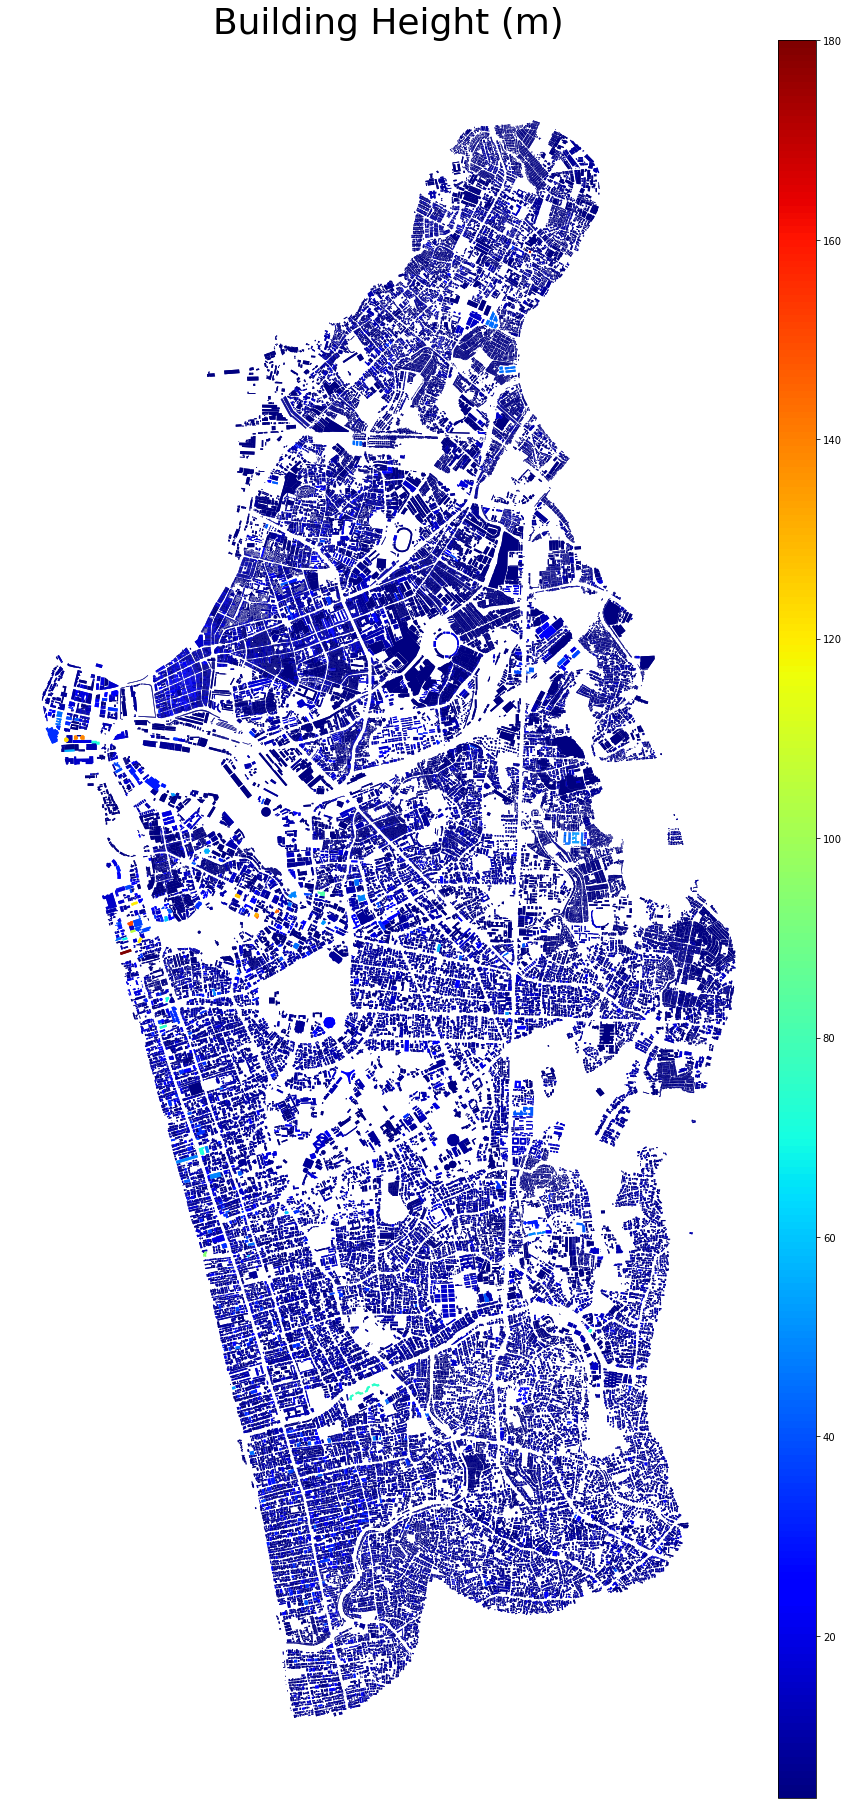

In [5]:
fig, ax = plt.subplots(1, 1,figsize=(25,25))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
# Z1=shapefile['bldgH']
# norm=colors.LogNorm(vmin=Z1.min(), vmax=Z1.max())
shapefile.plot('bldgH',cmap='jet',ax=ax,
               legend=True, cax=cax)
plt.tight_layout()
plt.rc('font', size=30)
ax.set_title('Building Height (m)')
ax.set_axis_off()
plt.savefig('Colombo_bldgH.png',dpi=300)

In [7]:
def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))
shapefile = shapefile.to_crs(epsg=3857)

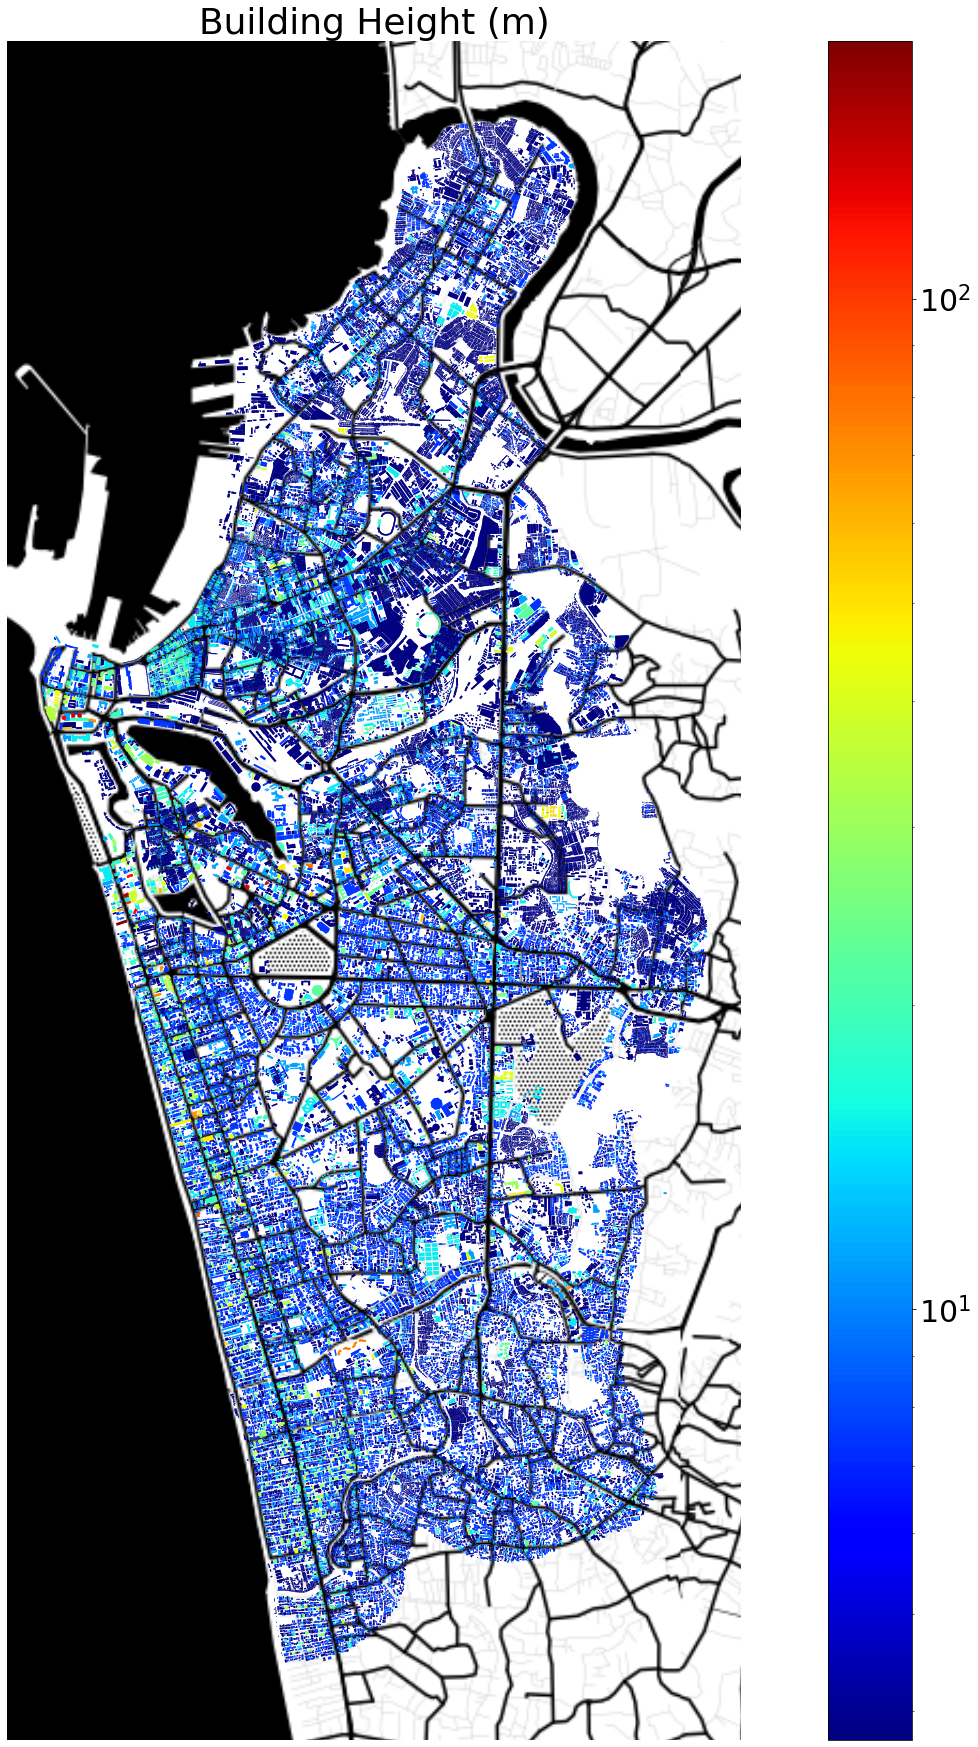

In [30]:
fig, ax = plt.subplots(1, 1,figsize=(25,25))
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.1)
Z1=shapefile['bldgH']
norm=colors.LogNorm(vmin=Z1.min(), vmax=Z1.max())

a=shapefile.plot('bldgH',alpha=0.9,norm=norm,cmap='jet',ax=ax)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='jet'), ax=ax)
plt.tight_layout()
plt.rc('font', size=30)
ax.set_title('Building Height (m)')
ax.set_axis_off()
add_basemap(ax, zoom=13,url=ctx.sources.ST_TONER_BACKGROUND)
plt.savefig('Colombo_bldgH_basemap.png',dpi=200)

In [127]:
# shapefile_building = gpd.read_file("Data/CMC_bldg_500mbuffer/CMC_bldg_500mbuffer.shp")
# shapefile_building=shapefile_building.sort_values('Area').iloc[::2,:]
# shapefile_building['building_code']=1
# to_drop=['FR_MainUse', 'FR_Pre_Use', 'FR_N_Floor', 'FR_Name', 'FR_Remarks',
#        'FR_Ownersh', 'FR_Conditi', 'FR_Status', 'FR_Code']
# shapefile_building=shapefile_building.drop(to_drop,axis=1)
# shapefile_building.to_file('buildings.shp')

In [128]:
# shapefile_green = gpd.read_file("Data/green/green spaces.shp")
# shapefile_green['green_code']=1
# to_drop=['ID','GRIDCODE']
# shapefile_green=shapefile_green.drop(to_drop,axis=1)
# shapefile_green.head()
# shapefile_green.to_file('green.shp')

In [162]:
# shapefile_bg = gpd.read_file("Building-Green-Final/building-green.shp")
# shapefile_bg=shapefile_bg.drop(['Area','Area_2','_errors','_errors_2'],axis=1)
# shapefile_bg=shapefile_bg.fillna(0)
# shapefile_bg['green']=shapefile_bg.apply(lambda x: x.green_code+x.green_co_1,axis=1)
# shapefile_bg['building']=shapefile_bg.apply(lambda x: x.building_c+x.building_1,axis=1)
# shapefile_bg=shapefile_bg.drop(['green_code','green_co_1','building_c','building_1'],axis=1)

In [227]:
# shapefile_bgw=gpd.read_file('building-green-water-final/Building-Green-Water-Final.shp')

In [ ]:
# fig, ax = plt.subplots(1, 1,figsize=(25,25))
# shapefile_bgw.plot(column='surface_ty',cmap='jet',categorical=True, legend=True,ax=ax)
# plt.savefig('Colombo_LC.png',dpi=200)

In [16]:
# shapefile_road = gpd.read_file('Paved-final/roads.shp')
# shapefile_road=shapefile_road.drop(['fid','cat','a_cat','a_field','b_cat','b_surface_','id'],axis=1)
# shapefile_road['road']=3
# shapefile_road.to_file('road_final')
# shapefile_water = gpd.read_file('Water-Final/water.shp')
# shapefile_water=shapefile_water.drop(['id','id_2'],axis=1)
# shapefile_water['water']=4


In [ ]:
# import geopandas as gpd
# shapefile_road = gpd.read_file('road_final/road_final.shp')
# shapefile_bgw = gpd.read_file('building-green-water-final_2/bldg_green_water_2.shp')
# res_union = gpd.overlay(shapefile_bgw, shapefile_road, how='union')
# res_union.to_file('res_union')

In [2]:
# final = gpd.read_file('final/final.shp')
# final=final.drop(['fid','cat','a_cat','b_cat'],axis=1)final=final.fillna(0)
# a=final[(final.b_water!=0)&(final.b_surface_!=0)]
# final.loc[a.index,'b_water']=0.0
# a=final[(final.b_water!=0)&(final.a_road!=0)]
# final.loc[a.index,'b_water']=0.0
# a=final[(final.b_surface_!=0)&(final.a_road!=0)]
# final.loc[a.index,'a_road']=0.0
# final['cat']=final.a_road+final.b_surface_+final.b_water
# final=final.drop(['a_road','b_water','b_surface_'],axis=1)

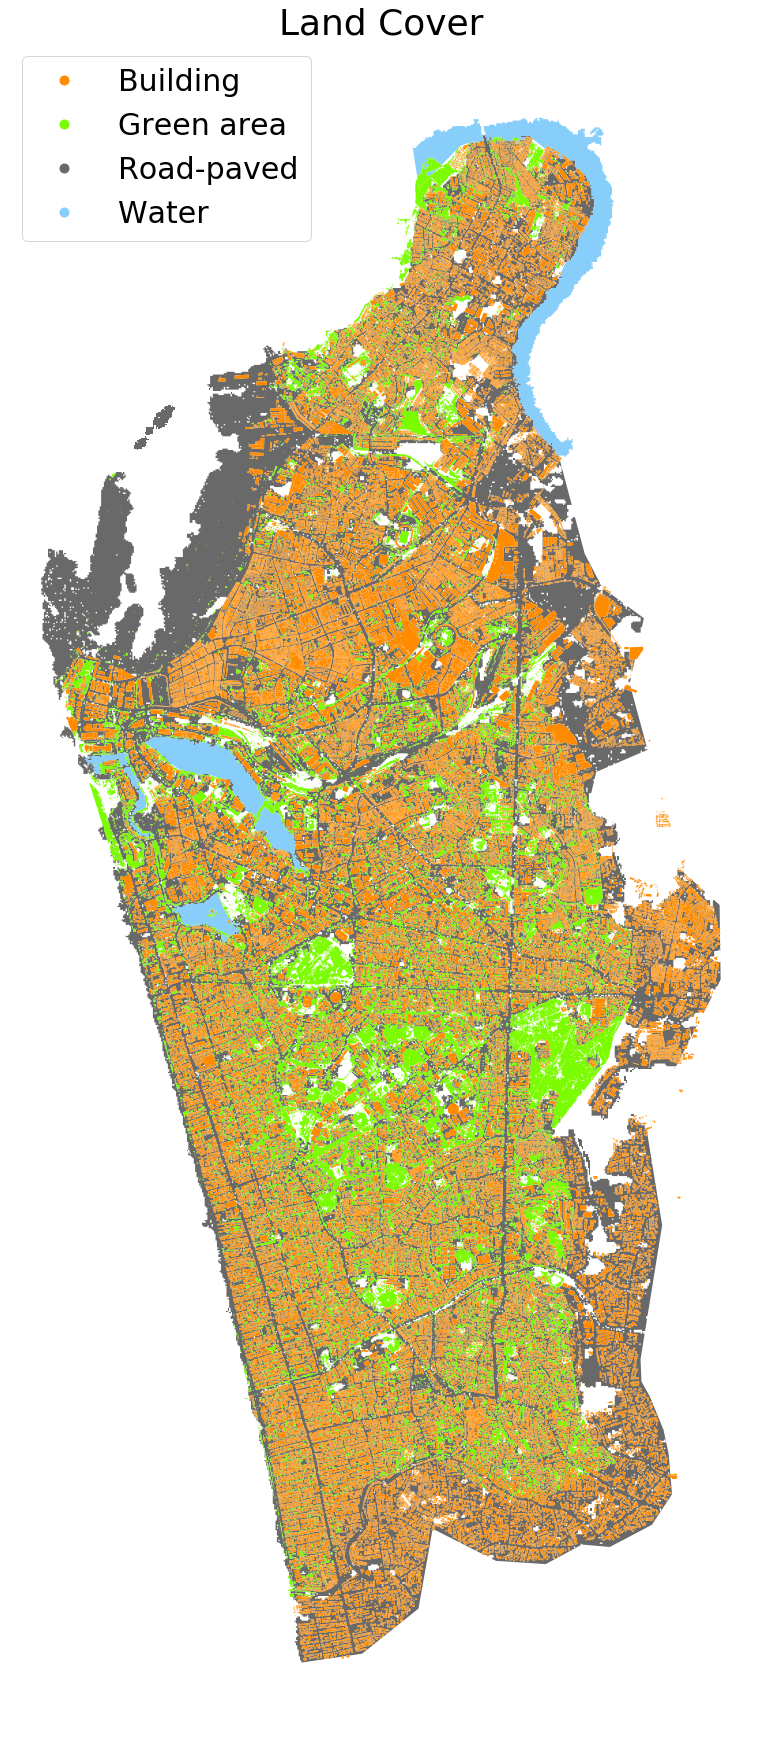

In [10]:
fig, ax = plt.subplots(1, 1,figsize=(25,25))
final=gpd.read_file('final_all/final_all.shp')
final = final.to_crs(epsg=3857)
a=final[final.cat==1]
final.loc[a.index,'cat']='Building'
a=final[final.cat==2]
final.loc[a.index,'cat']='Green area'
a=final[final.cat==3]
final.loc[a.index,'cat']='Road-paved'
a=final[final.cat==4]
final.loc[a.index,'cat']='Water'
cmap=mpl.colors.ListedColormap(['darkorange', 'lawngreen', 'dimgray', 'lightskyblue'])
final.plot(column='cat',cmap=cmap,categorical=True,ax=ax, legend=True,legend_kwds={'loc': 'upper left'})
#add_basemap(ax, zoom=13,url=ctx.sources.ST_TONER_BACKGROUND)

plt.tight_layout()
plt.rc('font', size=30)
ax.set_title('Land Cover')
ax.set_axis_off()
# leg = ax.get_legend()
# leg.set_bbox_to_anchor((0., 0., 0.2, 0.2))
plt.savefig('Colombo_LC.png',dpi=200)

In [4]:
# final=gpd.read_file('final_all/final_all.shp')

In [ ]:
# final.head()

In [ ]:

# from shapely.geometry import Polygon

# points= final
# xmin,ymin,xmax,ymax = points.total_bounds

# lenght = 1000
# wide = 1200

# cols = list(range(int(np.floor(xmin)), int(np.ceil(xmax)), wide))
# rows = list(range(int(np.floor(ymin)), int(np.ceil(ymax)), lenght))
# rows.reverse()

# polygons = []
# for x in cols:
#     for y in rows:
#         polygons.append( Polygon([(x,y), (x+wide, y), (x+wide, y-lenght), (x, y-lenght)]) )

# grid = gpd.GeoDataFrame({'geometry':polygons})

In [ ]:
# fig, ax = plt.subplots(1, 1,figsize=(25,25))
# grid.plot(ax=ax,alpha=0.2)
# final.plot(ax=ax)

In [ ]:
# final_sorted=final.loc[final.bounds.sort_values('miny',ascending=False).index,:]

In [ ]:
# a=gpd.GeoSeries(grid.geometry[10])
# df1 = gpd.GeoDataFrame({'geometry': a})
# intersects=[]
# for i in range(final_sorted.size) :
#     b=gpd.GeoSeries(final_sorted.geometry[i])
#     df2 = gpd.GeoDataFrame({'geometry': b})
#     inter_size=gpd.overlay(df1,df2,how='intersection').size
#     if (inter_size!=0):
#         intersects.append(b)
#     if(b.total_bounds[3]<a.total_bounds[1]):
#         break

In [ ]:
# df2=gpd.GeoDataFrame({'geometry': [x.values[0] for x in intersects]})
# #df2=gpd.GeoDataFrame({'geometry': b})
# fig, ax = plt.subplots(1, 1,figsize=(25,25))
# df2.plot(ax=ax)
# df1.plot(ax=ax,alpha=.2)

In [ ]:
# final_sorted

In [3]:
final=gpd.read_file('LC_colombo/LC_colombo.shp')

In [4]:
final.head()

DN  area_1           left            top          right         bottom  \
0   6  383.74  376777.111964  771781.260645  376797.111964  771761.260645   
1   6  383.74  376777.111964  771801.260645  376797.111964  771781.260645   
2   6  383.74  376757.111964  771801.260645  376777.111964  771781.260645   
3   6  383.74  376757.111964  771781.260645  376777.111964  771761.260645   
4   6  383.74  375757.111964  771761.260645  375777.111964  771741.260645   

       id  area_grid  area_final  \
0  196845     400.17       90.87   
1  196844     400.17      155.61   
2  196123     400.17       86.66   
3  196124     400.17       50.60   
4  160075     400.17      258.99   

                                            geometry  
0  POLYGON ((376785.6580558142 771781.2606454146,...  
1  POLYGON ((376777.111964383 771799.4610937843, ...  
2  POLYGON ((376772.3525908715 771799.4610937843,...  
3  POLYGON ((376777.111964383 771770.6325864085, ...  
4  POLYGON ((375774.4427201723 771761.2606454146,...

In [5]:
grid=gpd.read_file('grid_final/grid_final.shp')

In [6]:
final['fraction']=final['area_final']/final['area_grid']

In [7]:
final.head()

DN  area_1           left            top          right         bottom  \
0   6  383.74  376777.111964  771781.260645  376797.111964  771761.260645   
1   6  383.74  376777.111964  771801.260645  376797.111964  771781.260645   
2   6  383.74  376757.111964  771801.260645  376777.111964  771781.260645   
3   6  383.74  376757.111964  771781.260645  376777.111964  771761.260645   
4   6  383.74  375757.111964  771761.260645  375777.111964  771741.260645   

       id  area_grid  area_final  \
0  196845     400.17       90.87   
1  196844     400.17      155.61   
2  196123     400.17       86.66   
3  196124     400.17       50.60   
4  160075     400.17      258.99   

                                            geometry  fraction  
0  POLYGON ((376785.6580558142 771781.2606454146,...  0.227078  
1  POLYGON ((376777.111964383 771799.4610937843, ...  0.388860  
2  POLYGON ((376772.3525908715 771799.4610937843,...  0.216558  
3  POLYGON ((376777.111964383 771770.6325864085, ...  0.126446  
4  POLYGON ((375774.4427201723 771761.2606454146,...  0.647200

In [8]:
non_valid=final[final.DN==8].id.unique()
final_cleaned=final[~final.id.isin(non_valid)]

In [54]:
final_cleaned.to_file('Landcover_Colombo')

In [10]:
LF=pd.DataFrame(columns=['id','lon','lat','1','2','3','4','5','6','7'])
ids=np.sort(final_cleaned.id.unique())
mv=np.max(ids)
for i in tqdm(ids):
    lon=grid[grid.id==i].centroid.to_crs(epsg=4326).x.values[0]
    lat=grid[grid.id==i].centroid.to_crs(epsg=4326).y.values[0]
    LF=LF.append({'id':int(i), 'lon':lon, 'lat':lat,
               '1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0},
              ignore_index=True)

100%|██████████| 194498/194498 [26:33<00:00, 122.06it/s]


In [30]:
LF_temp=LF.copy()
for i in tqdm(final_cleaned.index):
    idx=LF_temp[LF_temp.id==final_cleaned.loc[i,'id']].index
    LF_temp.loc[idx,str(final_cleaned.loc[i,'DN'])]=LF_temp.loc[idx,str(final_cleaned.loc[i,'DN'])]+final_cleaned.loc[i,'fraction']


100%|██████████| 328569/328569 [10:52<00:00, 503.72it/s]


In [49]:
a=LF_temp['1']+LF_temp['2']+LF_temp['3']+LF_temp['4']+LF_temp['5']+LF_temp['6']+LF_temp['7']
b=np.round(a,1)
LF_temp=LF_temp.drop(b[b!=1].index)

In [ ]:
LF_temp.columns=['id', 'lon', 'lat', 
                 'Fr_Paved' ,'Fr_Bldgs' ,'Fr_EveTr' ,'Fr_DecTr' ,'Fr_Grass' ,'Fr_Bsoil','Fr_Water']

In [57]:
LF_temp.to_csv('LCF_Colombo.csv')